In [125]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from folium.plugins import HeatMap


In [117]:
df = pd.read_csv(r'dadosdeng.csv', delimiter=';', decimal=",",
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

In [118]:
for k in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): print(k, df.columns[k])

1 TARGET_FID
2 JOIN_FID
3 IDADE
4 SEXO
5 DIAGNOSTICO
6 DATA_ATENDIMENTO
7 BAIRO_NOME
8 ZONA
9 Faixa
10 x2
11 y2


In [119]:
df.sample(1000)

,ï»¿Join_Count,TARGET_FID,JOIN_FID,IDADE,SEXO,DIAGNOSTICO,DATA_ATENDIMENTO,BAIRO_NOME,ZONA,Faixa,x2,y2
902,0,1769,-1,48,M,Dengue,15/09/2013,PQ INDUSTRIAL,SUL,40,-45.902100,-23.234688
2652,0,2310,-1,38,F,Dengue,15/11/2013,JD ITAPUA,CENTRO,30,-45.890808,-23.289905
1013,0,1940,-1,17,M,Dengue,15/09/2013,CENTRO,CENTRO,10,-45.871469,-23.181609
459,0,884,-1,69,M,Dengue,15/09/2013,BOSQUE EUCALIPTOS,SUL,60,-45.899376,-23.230149
111,0,223,-1,31,M,Dengue,15/09/2013,JD SATELITE,SUL,30,-45.892918,-23.215417
...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,1646,-1,69,M,Dengue,15/09/2013,JD SANTO ONOFRE,SUDESTE,60,-45.825960,-23.244729
1704,0,325,-1,43,F,Dengue,15/11/2013,PQ SANTA RITA,SUDESTE,40,-45.853994,-23.203899
978,0,1901,-1,38,M,Dengue,15/09/2013,CENTRO,CENTRO,30,-45.877499,-23.180119
777,0,1513,-1,20,M,Dengue,15/11/2013,JD COLONIAL,SUL,20,-45.887836,-23.277424


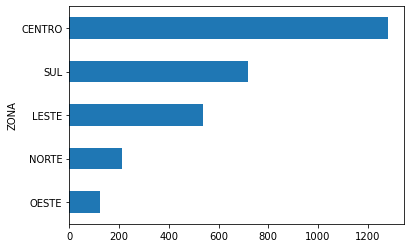

In [120]:
df.groupby('ZONA').size().sort_values().tail(5).plot(kind='barh')

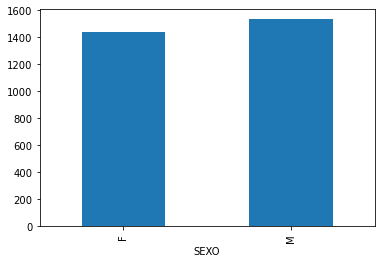

In [121]:
df.query('SEXO == "M" or SEXO == "F"').groupby('SEXO').size().sort_values().plot(kind='bar')

Text(0, 0.5, 'Casos')

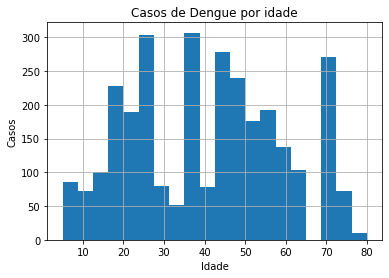

In [122]:
plot = df['IDADE'].hist(bins=20)
plot.set_title("Casos de Dengue por idade")
plot.set_xlabel("Idade")
plot.set_ylabel("Casos")

In [123]:
locations = df[['y2', 'x2']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[100]

[-23.22879602, -45.87714672]

In [124]:
map = folium.Map(location=[-23.210166, -45.892962], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

In [130]:
lat = df.y2.tolist()
lng = df.x2.tolist()
m = folium.Map(
    location=[-23.205236, -45.887855],
    tiles='cartodbdark_matter',
    zoom_start=12
)
HeatMap(list(zip(lat, lng))).add_to(m)
m